In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
!pip install plotly --upgrade

     |████████████████████████████████| 7.3MB 31kB/s  eta 0:00:01     |██████████████████████████████  | 6.8MB 1.7MB/s eta 0:00:01
  Found existing installation: plotly 4.2.1
    Uninstalling plotly-4.2.1:
      Successfully uninstalled plotly-4.2.1


In [4]:
!pip install chart-studio

     |████████████████████████████████| 81kB 190kB/s eta 0:00:011


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [6]:
!pip install pandas-profiling --upgrade

     |████████████████████████████████| 133kB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 614kB 6.0MB/s eta 0:00:01     |██████████▉                     | 204kB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 235kB 4.7MB/s eta 0:00:01


  Using cached https://files.pythonhosted.org/packages/74/3d/1ee25a26411ba0401b43c6376d2316a71addcc72ef8690b101b4ea56d76a/zipp-0.6.0-py2.py3-none-any.whl
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=148431 sha256=3936fcfc3631d392750396229c650fd1adada0c5855c85e3ba3119272ea28bc8
  Stored in directory: /home/nbuser/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27185 sha256=822965174ab868fd815ae9c47554314808b8b501b051524a5266056e96353cc5
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for confuse: filename=confuse-1.0.0-cp36-none-any.whl size=19566 sha256=f87485b0bf964cb233bbe0fc87afefb0e85ab2ce1c8fd8e802ea5743e963ddcd
  Stored in directory: /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pan

In [7]:
import pandas_profiling 

In [8]:
# Importing the 1st dataset (Nutrition Facts for McDonald's Menu dataset).
# , encoding = "ISO-8859-1"
# df_menu = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/FastFoodRestaurants.csv')
df_EPL = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/European_Premier_League.csv')
df_EPL.tail(10)



,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9654,E0,13/05/18,Burnley,Bournemouth,1,2,A,1.0,0.0,H,2017-18
9655,E0,13/05/18,Crystal Palace,West Brom,2,0,H,0.0,0.0,D,2017-18
9656,E0,13/05/18,Huddersfield,Arsenal,0,1,A,0.0,1.0,A,2017-18
9657,E0,13/05/18,Liverpool,Brighton,4,0,H,2.0,0.0,H,2017-18
9658,E0,13/05/18,Man United,Watford,1,0,H,1.0,0.0,H,2017-18
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18
9663,E0,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18


In [9]:
df_EPL['HTHG'].value_counts()[:5]

0.0    4428
1.0    2982
2.0    1039
3.0    241 
4.0    42  
5.0    8   
Name: HTHG, dtype: int64

In [10]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = df_EPL.profile_report(title="EDA Profiling before Data Preprocessing")
profile.to_file(output_file="EDA_EPL_profiling_before_preprocessing.html")

In [11]:
df_EPL.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664.000000,9664.000000,8740.000000,8740.000000
mean,1.523903,1.121482,0.685469,0.488444
std,1.301671,1.121667,0.833581,0.710524
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,9.000000,8.000000,5.000000,5.000000


In [12]:
# Drop Column Div as it does not give any information
df_EPL.drop(['Div'], axis=1, inplace=True)

In [13]:
df_EPL.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9659,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18
9663,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18


In [45]:
# List Unique Teams
print (df_EPL['HomeTeam'].unique())
print (df_EPL['HomeTeam'].nunique())
print (df_EPL['AwayTeam'].unique())
print (df_EPL['HomeTeam'].nunique())


['Arsenal' 'Aston Villa' 'Chelsea' 'Liverpool' 'Man City' 'Newcastle'
 'Oldham' 'Sheffield United' 'Southampton' 'West Ham' 'Norwich'
 'Tottenham' 'Everton' 'Ipswich' 'Leeds' 'Wimbledon' 'Blackburn'
 'Coventry' 'Man United' 'QPR' 'Sheffield Weds' 'Swindon' 'Crystal Palace'
 'Leicester' "Nott'm Forest" 'Bolton' 'Middlesbrough' 'Derby' 'Sunderland'
 'Barnsley' 'Charlton' 'Watford' 'Bradford' 'Fulham' 'Birmingham'
 'Middlesboro' 'West Brom' 'Portsmouth' 'Wolves' 'Wigan' 'Reading' 'Hull'
 'Stoke' 'Burnley' 'Blackpool' 'Swansea' 'Cardiff' 'Bournemouth'
 'Brighton' 'Huddersfield']
50
['Coventry' 'QPR' 'Blackburn' 'Sheffield Weds' 'Leeds' 'Tottenham'
 'Ipswich' 'Swindon' 'Everton' 'Wimbledon' 'Man United' 'Arsenal'
 'Man City' 'Southampton' 'West Ham' 'Chelsea' 'Norwich' 'Newcastle'
 'Sheffield United' 'Liverpool' 'Aston Villa' 'Oldham' "Nott'm Forest"
 'Leicester' 'Crystal Palace' 'Bolton' 'Middlesbrough' 'Sunderland'
 'Derby' 'Barnsley' 'Charlton' 'Bradford' 'Watford' 'Fulham' 'West Brom'
 

In [65]:
from collections import Counter
Counter = Counter(df_EPL['HomeTeam']) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
print("Most Common Home Team: ", Counter.most_common(10)) 

Most Common Home Team:  [('Arsenal', 479), ('Chelsea', 479), ('Liverpool', 479), ('Tottenham', 479), ('Everton', 479), ('Man United', 479), ('Aston Villa', 441), ('Newcastle', 441), ('West Ham', 422), ('Man City', 384)]


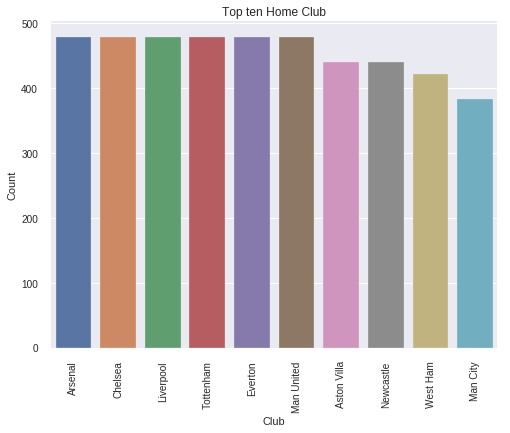

In [69]:
from collections import Counter
club_count = Counter(df_EPL['HomeTeam'].tolist()).most_common(10)
club_idx = [club[0] for club in club_count]
club_val = [club[1] for club in club_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = club_idx,y=club_val ,ax =ax)
plt.title('Top ten Home Club')
plt.xlabel('Club')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

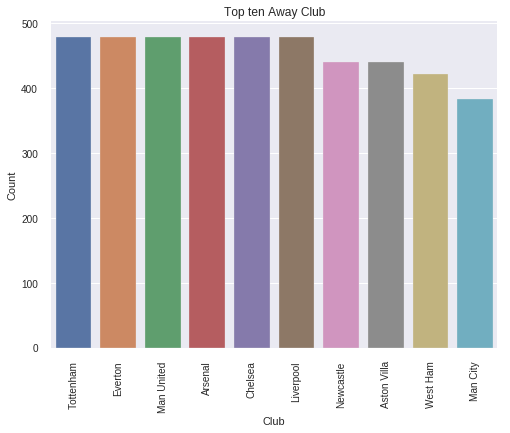

In [68]:
from collections import Counter
club_count = Counter(df_EPL['AwayTeam'].tolist()).most_common(10)
club_idx = [club[0] for club in club_count]
club_val = [club[1] for club in club_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = club_idx,y=club_val ,ax =ax)
plt.title('Top ten Away Club')
plt.xlabel('Club')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [100]:
from collections import Counter
Counter = Counter(df_EPL['AwayTeam']) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
print("Most Common Away Team: ", Counter.most_common(10)) 

Most Common Away Team:  [('Tottenham', 479), ('Everton', 479), ('Man United', 479), ('Arsenal', 479), ('Chelsea', 479), ('Liverpool', 479), ('Newcastle', 441), ('Aston Villa', 441), ('West Ham', 422), ('Man City', 384)]


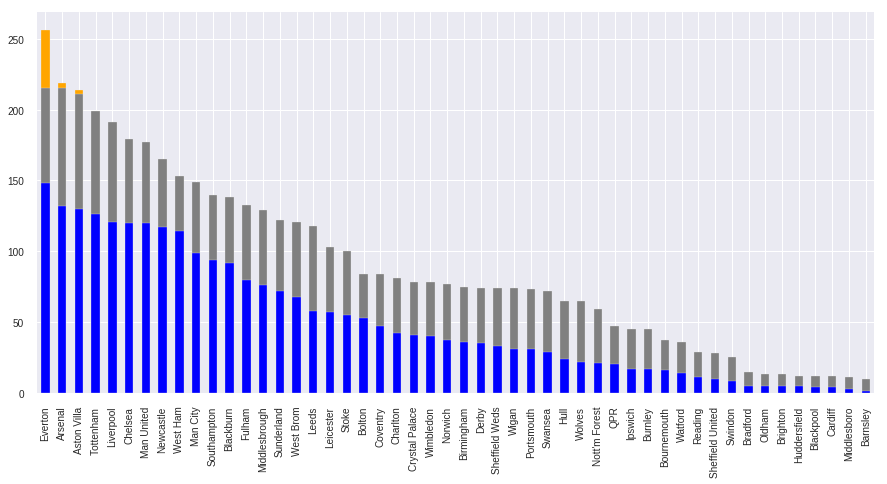

In [133]:
df_EPL['AwayTeam'][df_EPL['FTR'] == 'A'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')
df_EPL['AwayTeam'][df_EPL['FTR'] == 'H'].value_counts().plot(kind='bar', figsize=(15, 7), color='grey')
df_EPL['AwayTeam'][df_EPL['FTR'] == 'D'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

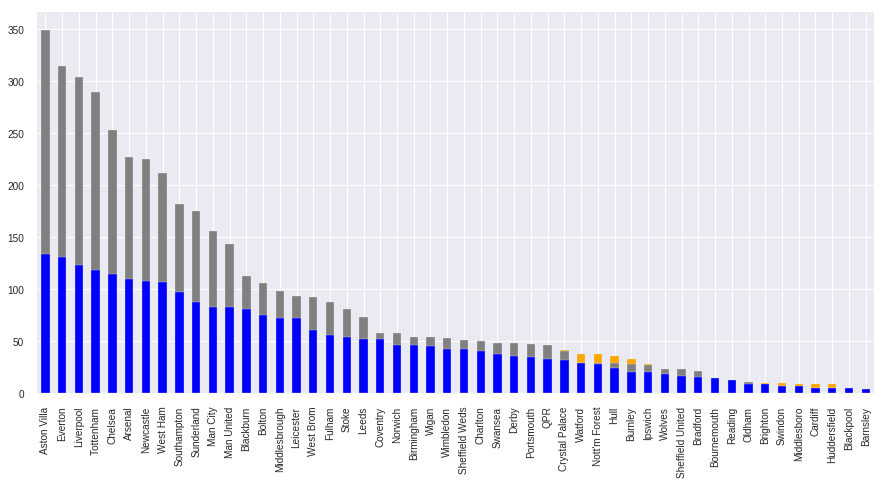

In [125]:
df_EPL['HomeTeam'][df_EPL['FTR'] == 'A'].value_counts().plot(kind='bar', figsize=(15, 7), color='orange')
df_EPL['HomeTeam'][df_EPL['FTR'] == 'H'].value_counts().plot(kind='bar', figsize=(15, 7), color='grey')
df_EPL['HomeTeam'][df_EPL['FTR'] == 'D'].value_counts().plot(kind='bar', figsize=(15, 7), color='blue')

In [15]:
# Calculating the median of the rows that have missing values "NaN".

df_EPL[~((df_EPL['HTHG']).astype(str) == 'NaN')]['HTHG'].median()

0.0

In [33]:
# Replacing missign HTHG values with Median
# df_EPL['HTHG'] = df_EPL['HTHG'].astype(str).str.replace('NaN', '0.0')
df_EPL['HTHG'] = df_EPL['HTHG'].fillna((df_EPL['HTHG'].median()))
df_EPL.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,month
0,14/08/93,Arsenal,Coventry,0,3,A,0.0,0.0,NaN,Summer,8
1,14/08/93,Aston Villa,QPR,4,1,H,0.0,0.0,NaN,Summer,8
2,14/08/93,Chelsea,Blackburn,1,2,A,0.0,0.0,NaN,Summer,8
3,14/08/93,Liverpool,Sheffield Weds,2,0,H,0.0,0.0,NaN,Summer,8
4,14/08/93,Man City,Leeds,1,1,D,0.0,0.0,NaN,Summer,8


In [17]:
df_EPL['HTAG'] = df_EPL['HTAG'].fillna((df_EPL['HTAG'].median()))
df_EPL.tail(5)


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
9659,13/05/18,Newcastle,Chelsea,3,0,H,1.0,0.0,H,2017-18
9660,13/05/18,Southampton,Man City,0,1,A,0.0,0.0,D,2017-18
9661,13/05/18,Swansea,Stoke,1,2,A,1.0,2.0,A,2017-18
9662,13/05/18,Tottenham,Leicester,5,4,H,1.0,2.0,A,2017-18
9663,13/05/18,West Ham,Everton,3,1,H,1.0,0.0,H,2017-18


In [18]:
df_EPL['month'] = pd.DatetimeIndex(df_EPL['Date']).month
df_EPL['month'][0]



8

In [19]:
# df_EPL['Season']= "Spring"


for i in range (len(df_EPL['Date'])):
    num = df_EPL['month'].values[i] 
    if int(num) in (3, 4, 5):
        df_EPL['Season'][i] = "Spring"
            
    elif int(num) in (6, 7, 8):
        df_EPL['Season'][i] = "Summer"
            
    elif int(num) in (9, 10, 11):
        df_EPL['Season'][i] = "Autumn"
            
    else:
        df_EPL['Season'][i] = "Winter"
            

In [32]:
df_EPL.describe()

,FTHG,FTAG,HTHG,HTAG,month
count,9664.000000,9664.000000,9664.000000,9664.000000,9664.000000
mean,1.523903,1.121482,0.619930,0.441743,6.762935
std,1.301671,1.121667,0.817953,0.690798,3.775522
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,1.000000,0.000000,0.000000,8.000000
75%,2.000000,2.000000,1.000000,1.000000,10.000000
max,9.000000,8.000000,5.000000,5.000000,12.000000


In [21]:
df_EPL_copy = df_EPL.copy()
df_EPL_copy.drop(['Date','HTR','month'], axis=1, inplace=True)
df_EPL_copy.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,Season
0,Arsenal,Coventry,0,3,A,0.0,0.0,Summer
1,Aston Villa,QPR,4,1,H,0.0,0.0,Summer
2,Chelsea,Blackburn,1,2,A,0.0,0.0,Summer
3,Liverpool,Sheffield Weds,2,0,H,0.0,0.0,Summer
4,Man City,Leeds,1,1,D,0.0,0.0,Summer


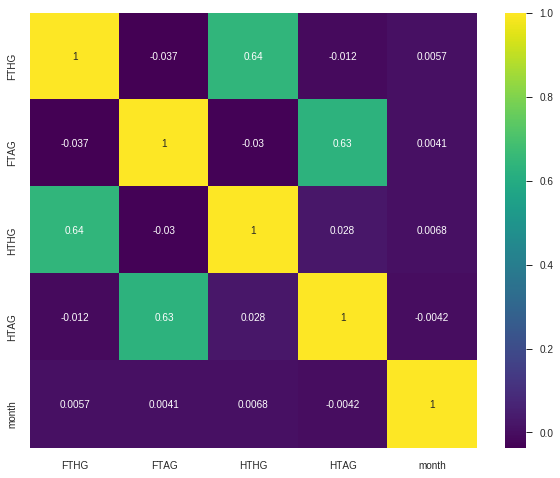

In [31]:
# Creating a correlation matrix using the corr function of the dataframe.
# Using seaborn's heatmap function to plot a heatmap of the correlatin matrix.

corr_EPL = df_EPL.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_EPL, annot=True, cmap='viridis')

In [22]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in df_EPL_copy.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    df_EPL_copy[i] = number.fit_transform(df_EPL_copy[i].astype('str'))

In [23]:
corr=df_EPL_copy.corr()['FTR']
corr[np.argsort(corr,axis=0)[::-1]]

FTR         1.000000
FTHG        0.614497
HTHG        0.400778
AwayTeam    0.076296
Season     -0.014383
HomeTeam   -0.068335
HTAG       -0.388042
FTAG       -0.620297
Name: FTR, dtype: float64

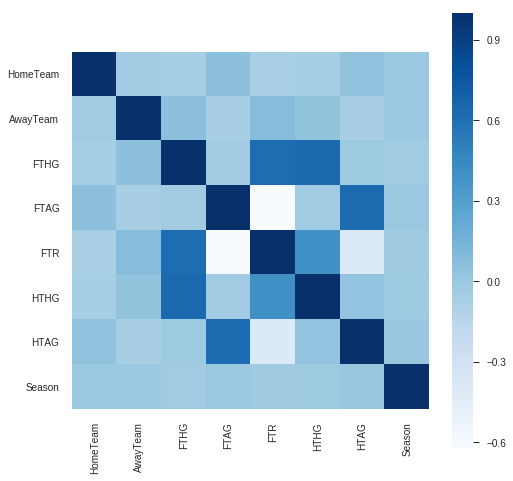

In [24]:
features_correlation = df_EPL_copy.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

Text(0.5, 1.0, 'FTR (Draw)')

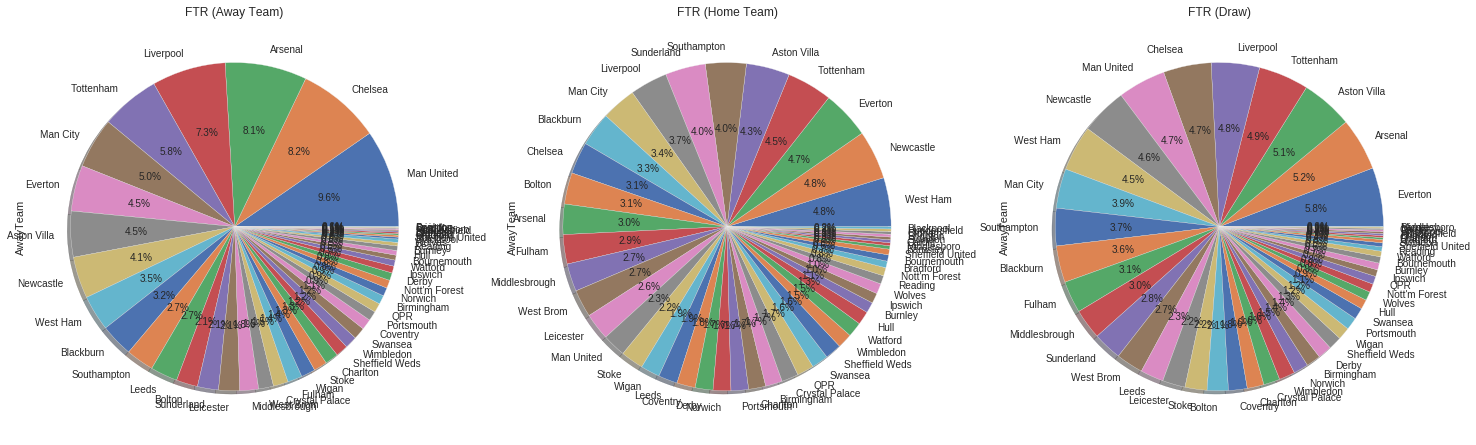

In [25]:
f,ax = plt.subplots(1,3,figsize=(22,6))
df_EPL['AwayTeam'][df_EPL['FTR'] == 'A'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, figsize=(25,12))
df_EPL['AwayTeam'][df_EPL['FTR'] == 'H'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
df_EPL['AwayTeam'][df_EPL['FTR'] == 'D'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('FTR (Away Team)')
ax[1].set_title('FTR (Home Team)')
ax[2].set_title('FTR (Draw)')

Text(0.5, 1.0, 'HomeTeam (Liverpool)')

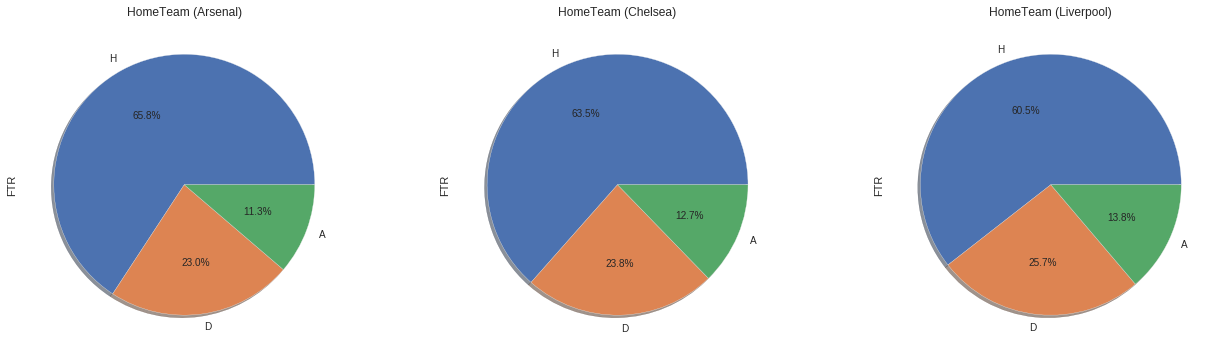

In [75]:
f,ax = plt.subplots(1,3,figsize=(22,6))
df_EPL['FTR'][df_EPL['HomeTeam'] == 'Arsenal'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
df_EPL['FTR'][df_EPL['HomeTeam'] == 'Chelsea'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
df_EPL['FTR'][df_EPL['HomeTeam'] == 'Liverpool'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('HomeTeam (Arsenal)')
ax[1].set_title('HomeTeam (Chelsea)')
ax[2].set_title('HomeTeam (Liverpool)')



Text(0.5, 1.0, 'AwayTeam (Man City)')

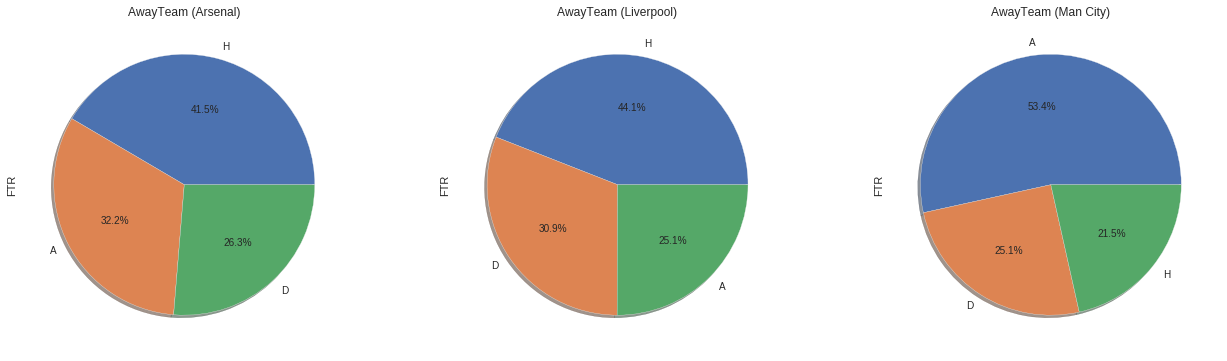

In [131]:
f,ax = plt.subplots(1,3,figsize=(22,6))
df_EPL['FTR'][df_EPL['AwayTeam'] == 'Tottenham'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
df_EPL['FTR'][df_EPL['AwayTeam'] == 'Everton'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
df_EPL['FTR'][df_EPL['AwayTeam'] == 'Man United'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[2],shadow=True)
ax[0].set_title('AwayTeam (Arsenal)')
ax[1].set_title('AwayTeam (Liverpool)')
ax[2].set_title('AwayTeam (Man City)')

In [28]:
df_EPL['HTHG'].value_counts()[:5]

0.0    5352
1.0    2982
2.0    1039
3.0    241 
4.0    42  
5.0    8   
Name: HTHG, dtype: int64

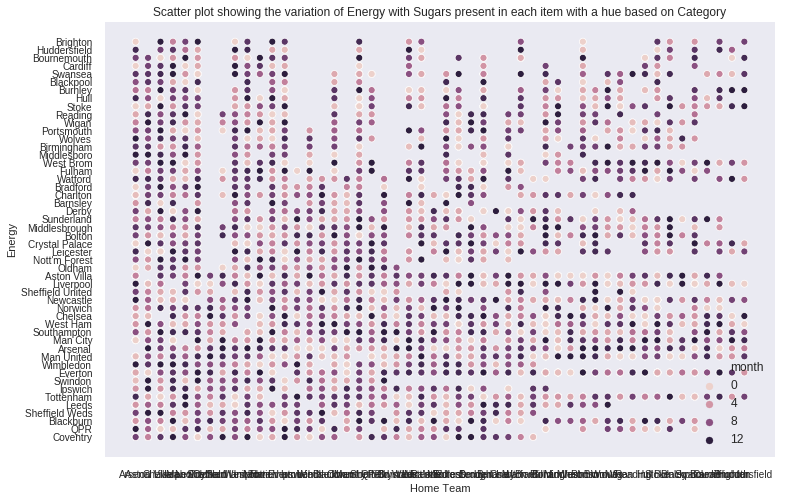

In [30]:
# Using seaborn's scatterplot function to plot the scatter plot for the Energy and Sugars columns.
# Setting hue='Category' to give different colors to the data points based on the category they belong to.

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_EPL, x='HomeTeam', y='AwayTeam', hue='month')

plt.xlabel('Home Team')
plt.ylabel('Energy')
plt.title('Scatter plot showing the variation of Energy with Sugars present in each item with a hue based on Category')
plt.grid(False)
plt.legend(fontsize=12)